### Setup

In [28]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [127]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_multiotsu
from sklearn.mixture import GaussianMixture
import scipy.ndimage as nd

from random import randint
from glob import glob

In [128]:
root_dir = 'C:/Users/AIC/Desktop/Projects/Segmentation/Coffee-Semantic-Segmentation-main/data/external'
img_path_list = glob(os.path.join(root_dir, 'images/**/*.jpg'))
mask_path_list = [path.replace('images', 'annotations').replace('.jpg', '_mask.png') for path in img_path_list]

In [132]:
idx = randint(0, len(img_path_list))

img = cv2.imread(img_path_list[idx])
mask = cv2.imread(mask_path_list[idx])

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hls_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [133]:
a_channel_img = lab_img[:,:,1]
b_channel_img = lab_img[:,:,2]
saturation_channel_img = hsv_img[:,:,1]
blue_channel_img = rgb_img[:,:,2]

### Image in Different Color Space

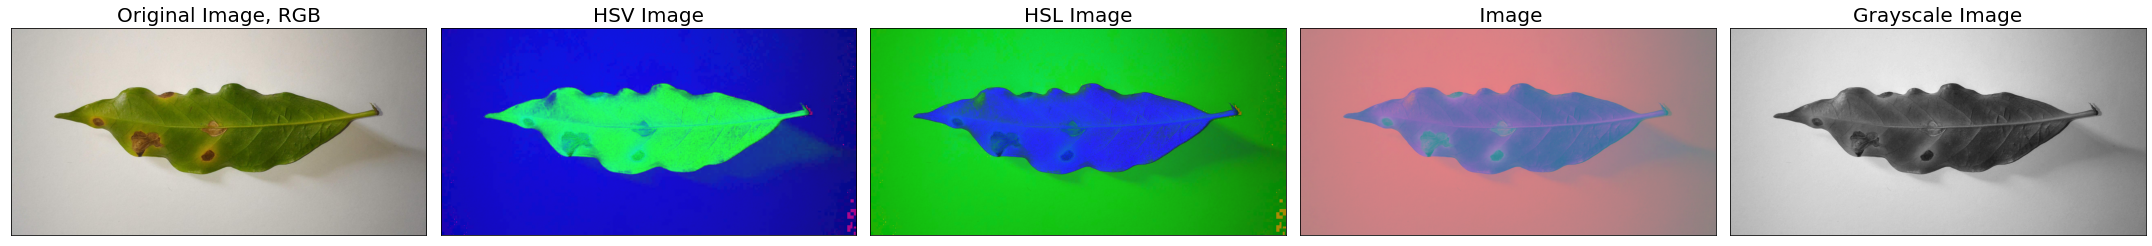

In [136]:
plt_idx = np.arange(5) + 151
img_list = [rgb_img, hsv_img, hls_img, lab_img, gray_img]
titles = ['Original Image, RGB', 'HSV Image', 'HSL Image', ' Image', 'Grayscale Image']

plt.figure(figsize=(30,20))
for idx, img, title in zip(plt_idx, img_list, titles):
    plt.subplot(idx)
    if title == 'Grayscale Image':
        plt.imshow(img, cmap='gray')
        plt.title(title, size=20)
        plt.xticks(ticks=[])
        plt.yticks(ticks=[])
        continue

    plt.imshow(img)
    plt.title(title, size=20)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

plt.tight_layout()


### Image in Different Channels

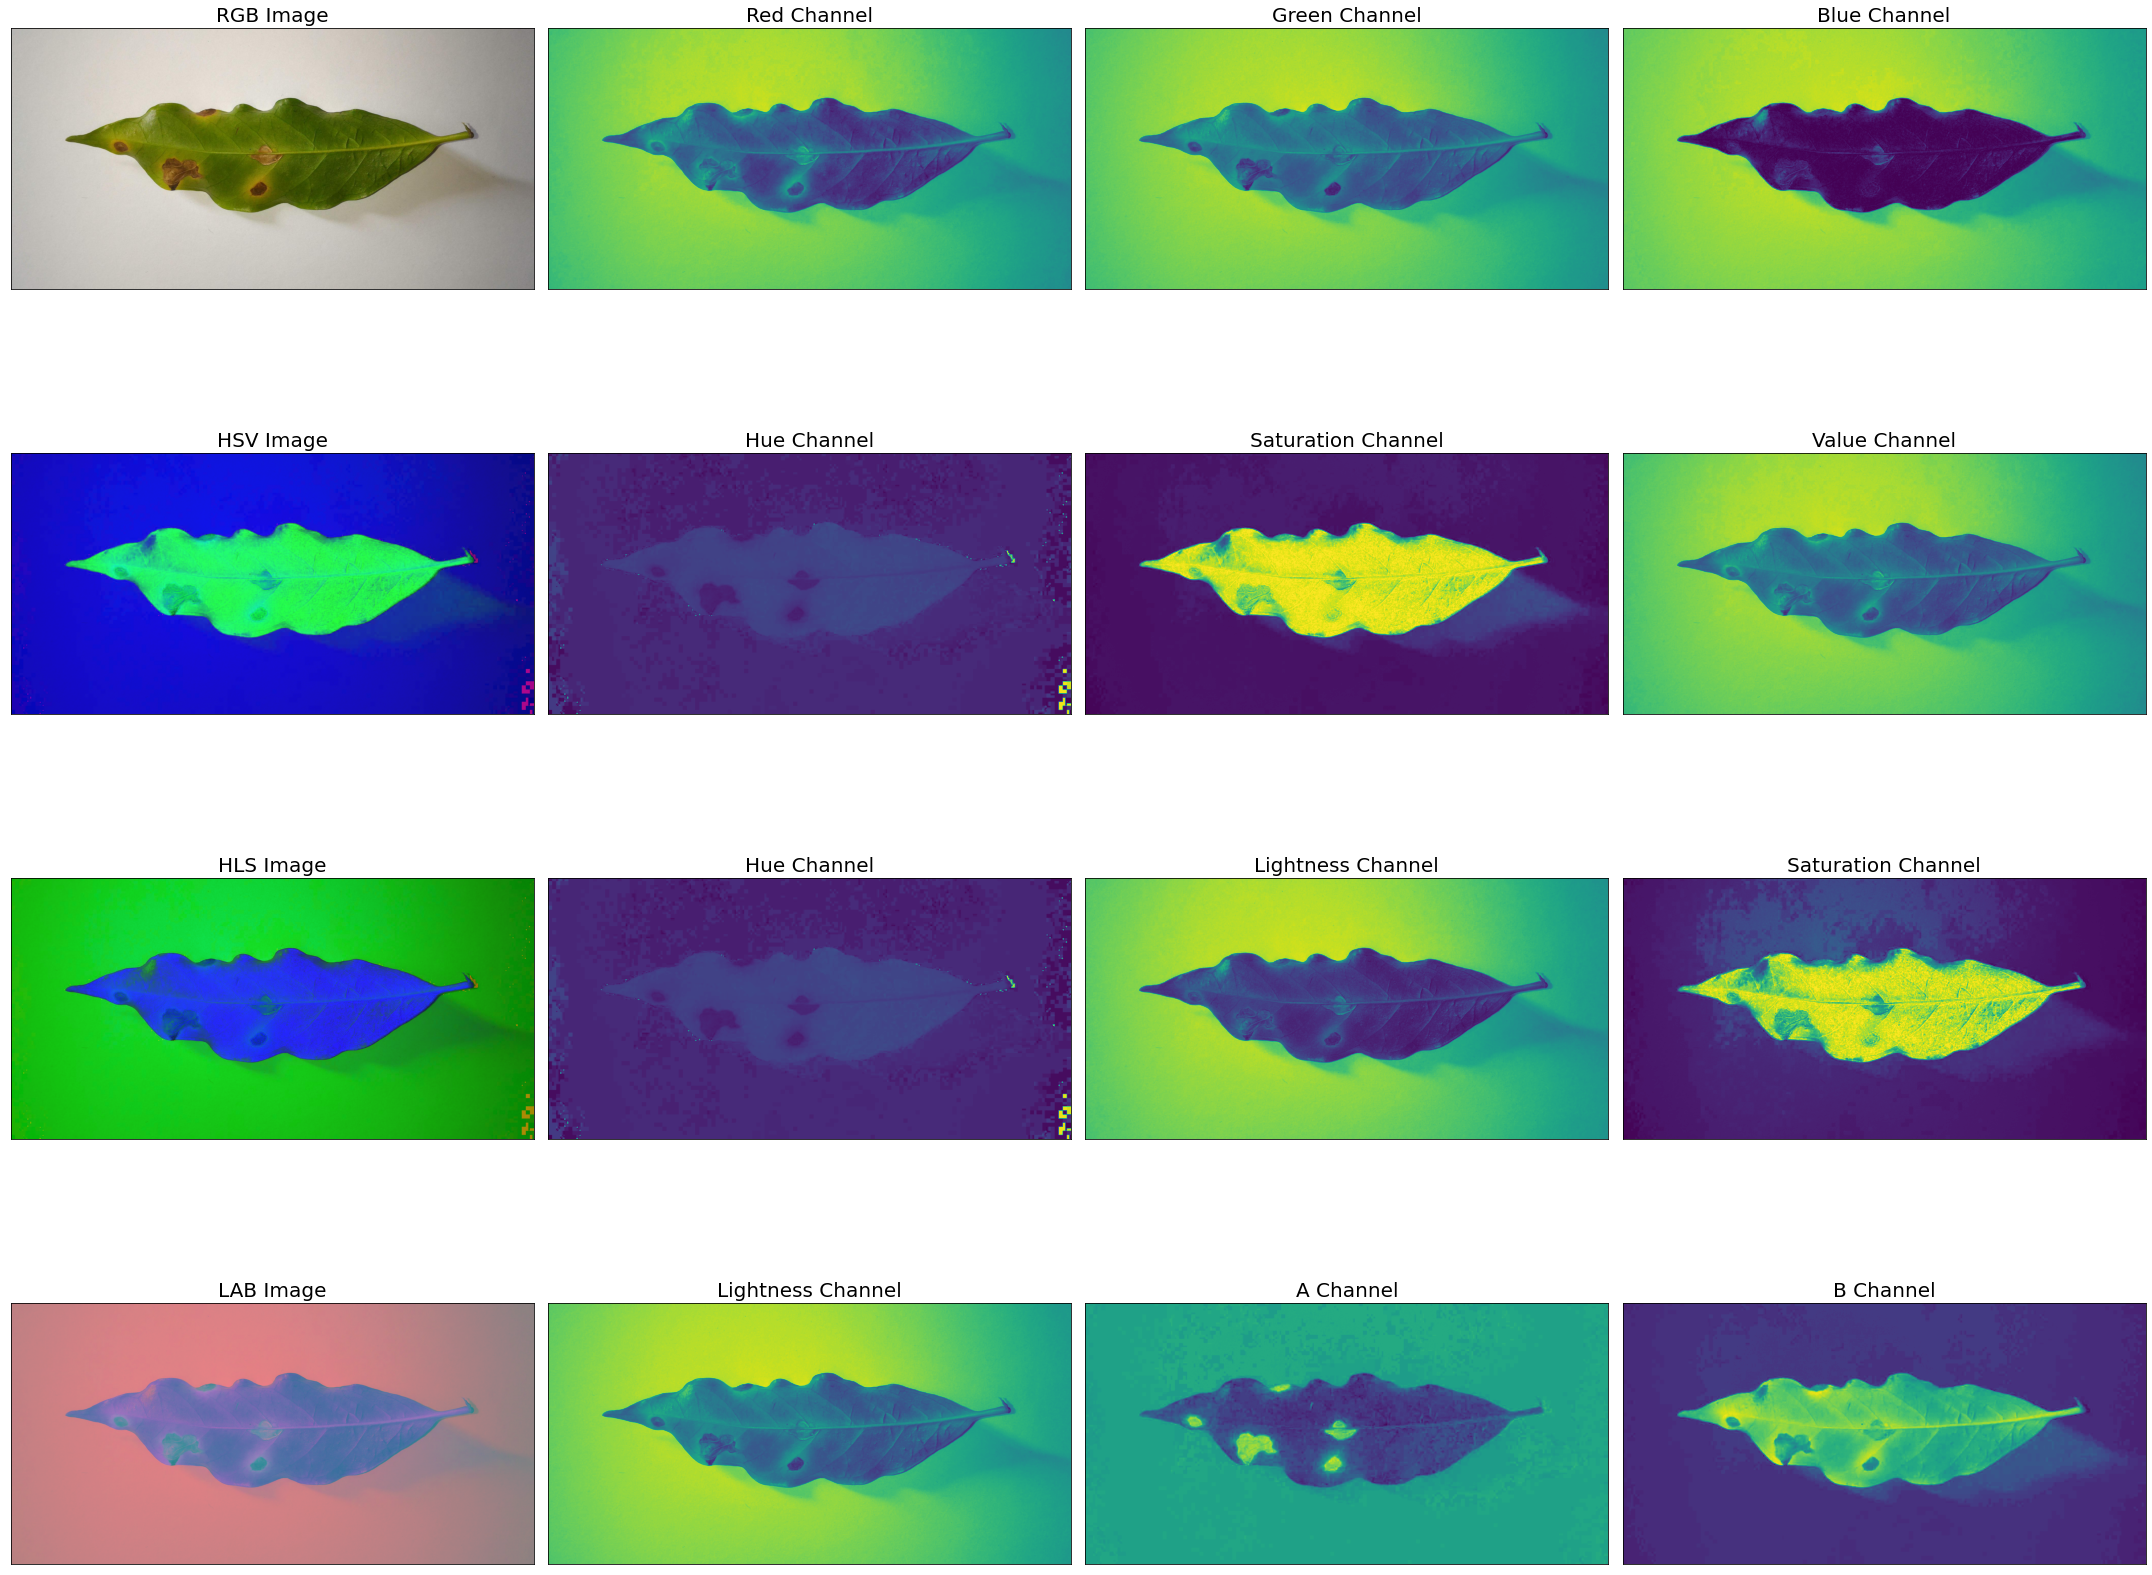

In [137]:
titles = [['RGB Image', 'Red Channel', 'Green Channel', 'Blue Channel'],
          ['HSV Image', 'Hue Channel', 'Saturation Channel', 'Value Channel'],
          ['HLS Image', 'Hue Channel', 'Lightness Channel', 'Saturation Channel'],
          ['LAB Image', 'Lightness Channel', 'A Channel', 'B Channel']]

img_list = [rgb_img, hsv_img, hls_img, lab_img]
channel_ids = np.arange(3)

_, ax = plt.subplots(nrows=4, ncols=4, subplot_kw={'xticks': [], 'yticks': []}, figsize=(30, 25))
for i, img in enumerate(img_list):
    for j in range(4):
        if j == 0:
            ax[i, j].imshow(img)
            ax[i, j].set_title(titles[i][j], size=20)
            continue           

        ax[i, j].imshow(img[:,:,j-1])        
        ax[i, j].set_title(titles[i][j], size=20)   
        
plt.tight_layout()


### Histograms for Different Color Spaces

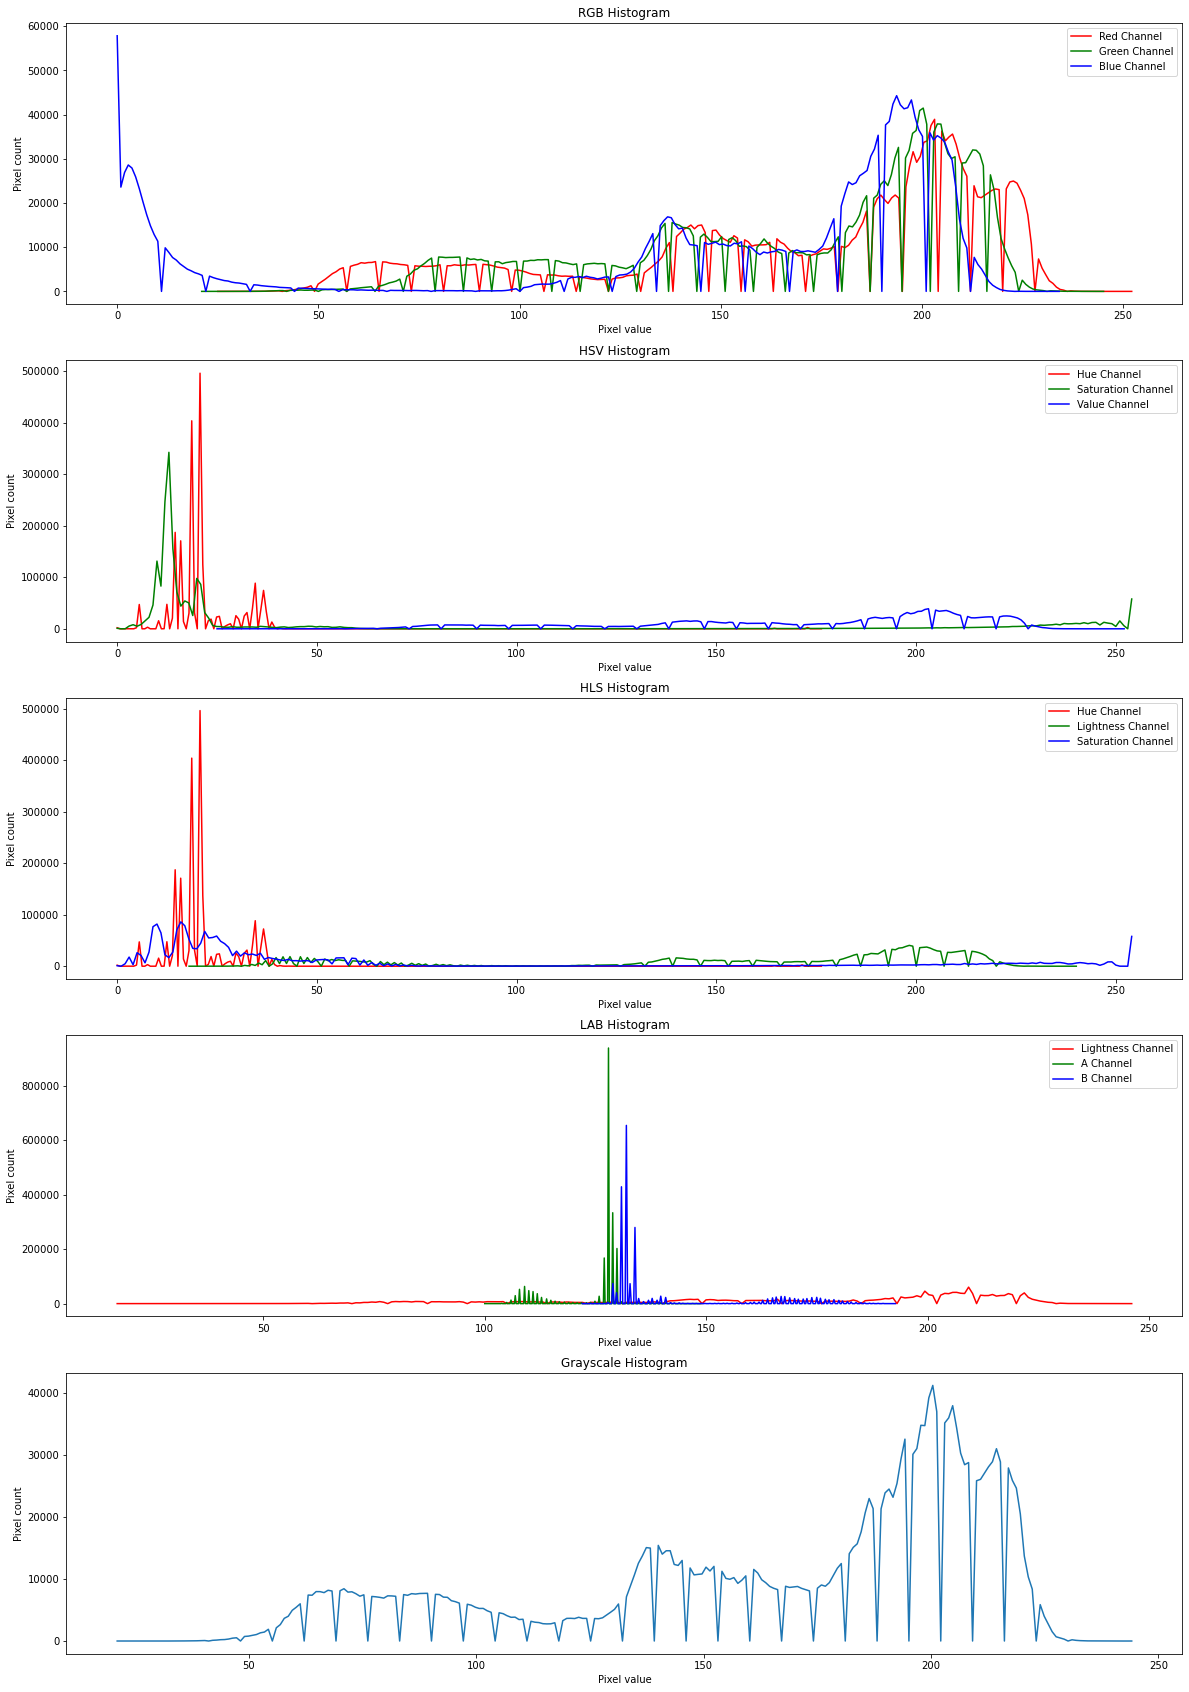

In [138]:
img_list = [rgb_img, hsv_img, hls_img, lab_img, gray_img]
titles = ['RGB Histogram', 'HSV Histogram', 'HLS Histogram', 'LAB Histogram', 'Grayscale Histogram']
labels =[['Red Channel', 'Green Channel', 'Blue Channel'], 
         ['Hue Channel', 'Saturation Channel', 'Value Channel'],  
         ['Hue Channel', 'Lightness Channel', 'Saturation Channel'],  
         ['Lightness Channel', 'A Channel', 'B Channel']]


colors = ['red', 'green', 'blue']
channel_ids = np.arange(3)
plt_idx_list = np.arange(5) + 511

plt.figure(figsize=(20, 30))
for i, (img, idx, title) in enumerate(zip(img_list, plt_idx_list, titles)):  

    if i == 4:
        plt.subplot(idx)
        hist, bin_edges = np.histogram(img, bins=256, range=(img.min(), img.max()))
        plt.plot(bin_edges[:-1], hist)        
        plt.title(title)
        plt.xlabel("Pixel value")
        plt.ylabel("Pixel count")
        continue
    
    plt.subplot(idx)
    for j, (channel_id, color) in enumerate(zip(channel_ids, colors)):
        # hist, bin_edges = np.histogram(img[:,:,channel_id], bins=256, range=(img.min(), img.max()))
        hist, bin_edges = np.histogram(img[:,:,channel_id], bins=256, range=(img[:,:,channel_id].min(), img[:,:,channel_id].max()))
        plt.plot(bin_edges[:-1], hist, color=color, label=labels[i][j])

    plt.legend()
    plt.title(title)
    plt.xlabel("Pixel value")
    plt.ylabel("Pixel count")


### Comparing A-Channel of the LAB Image with the Mask

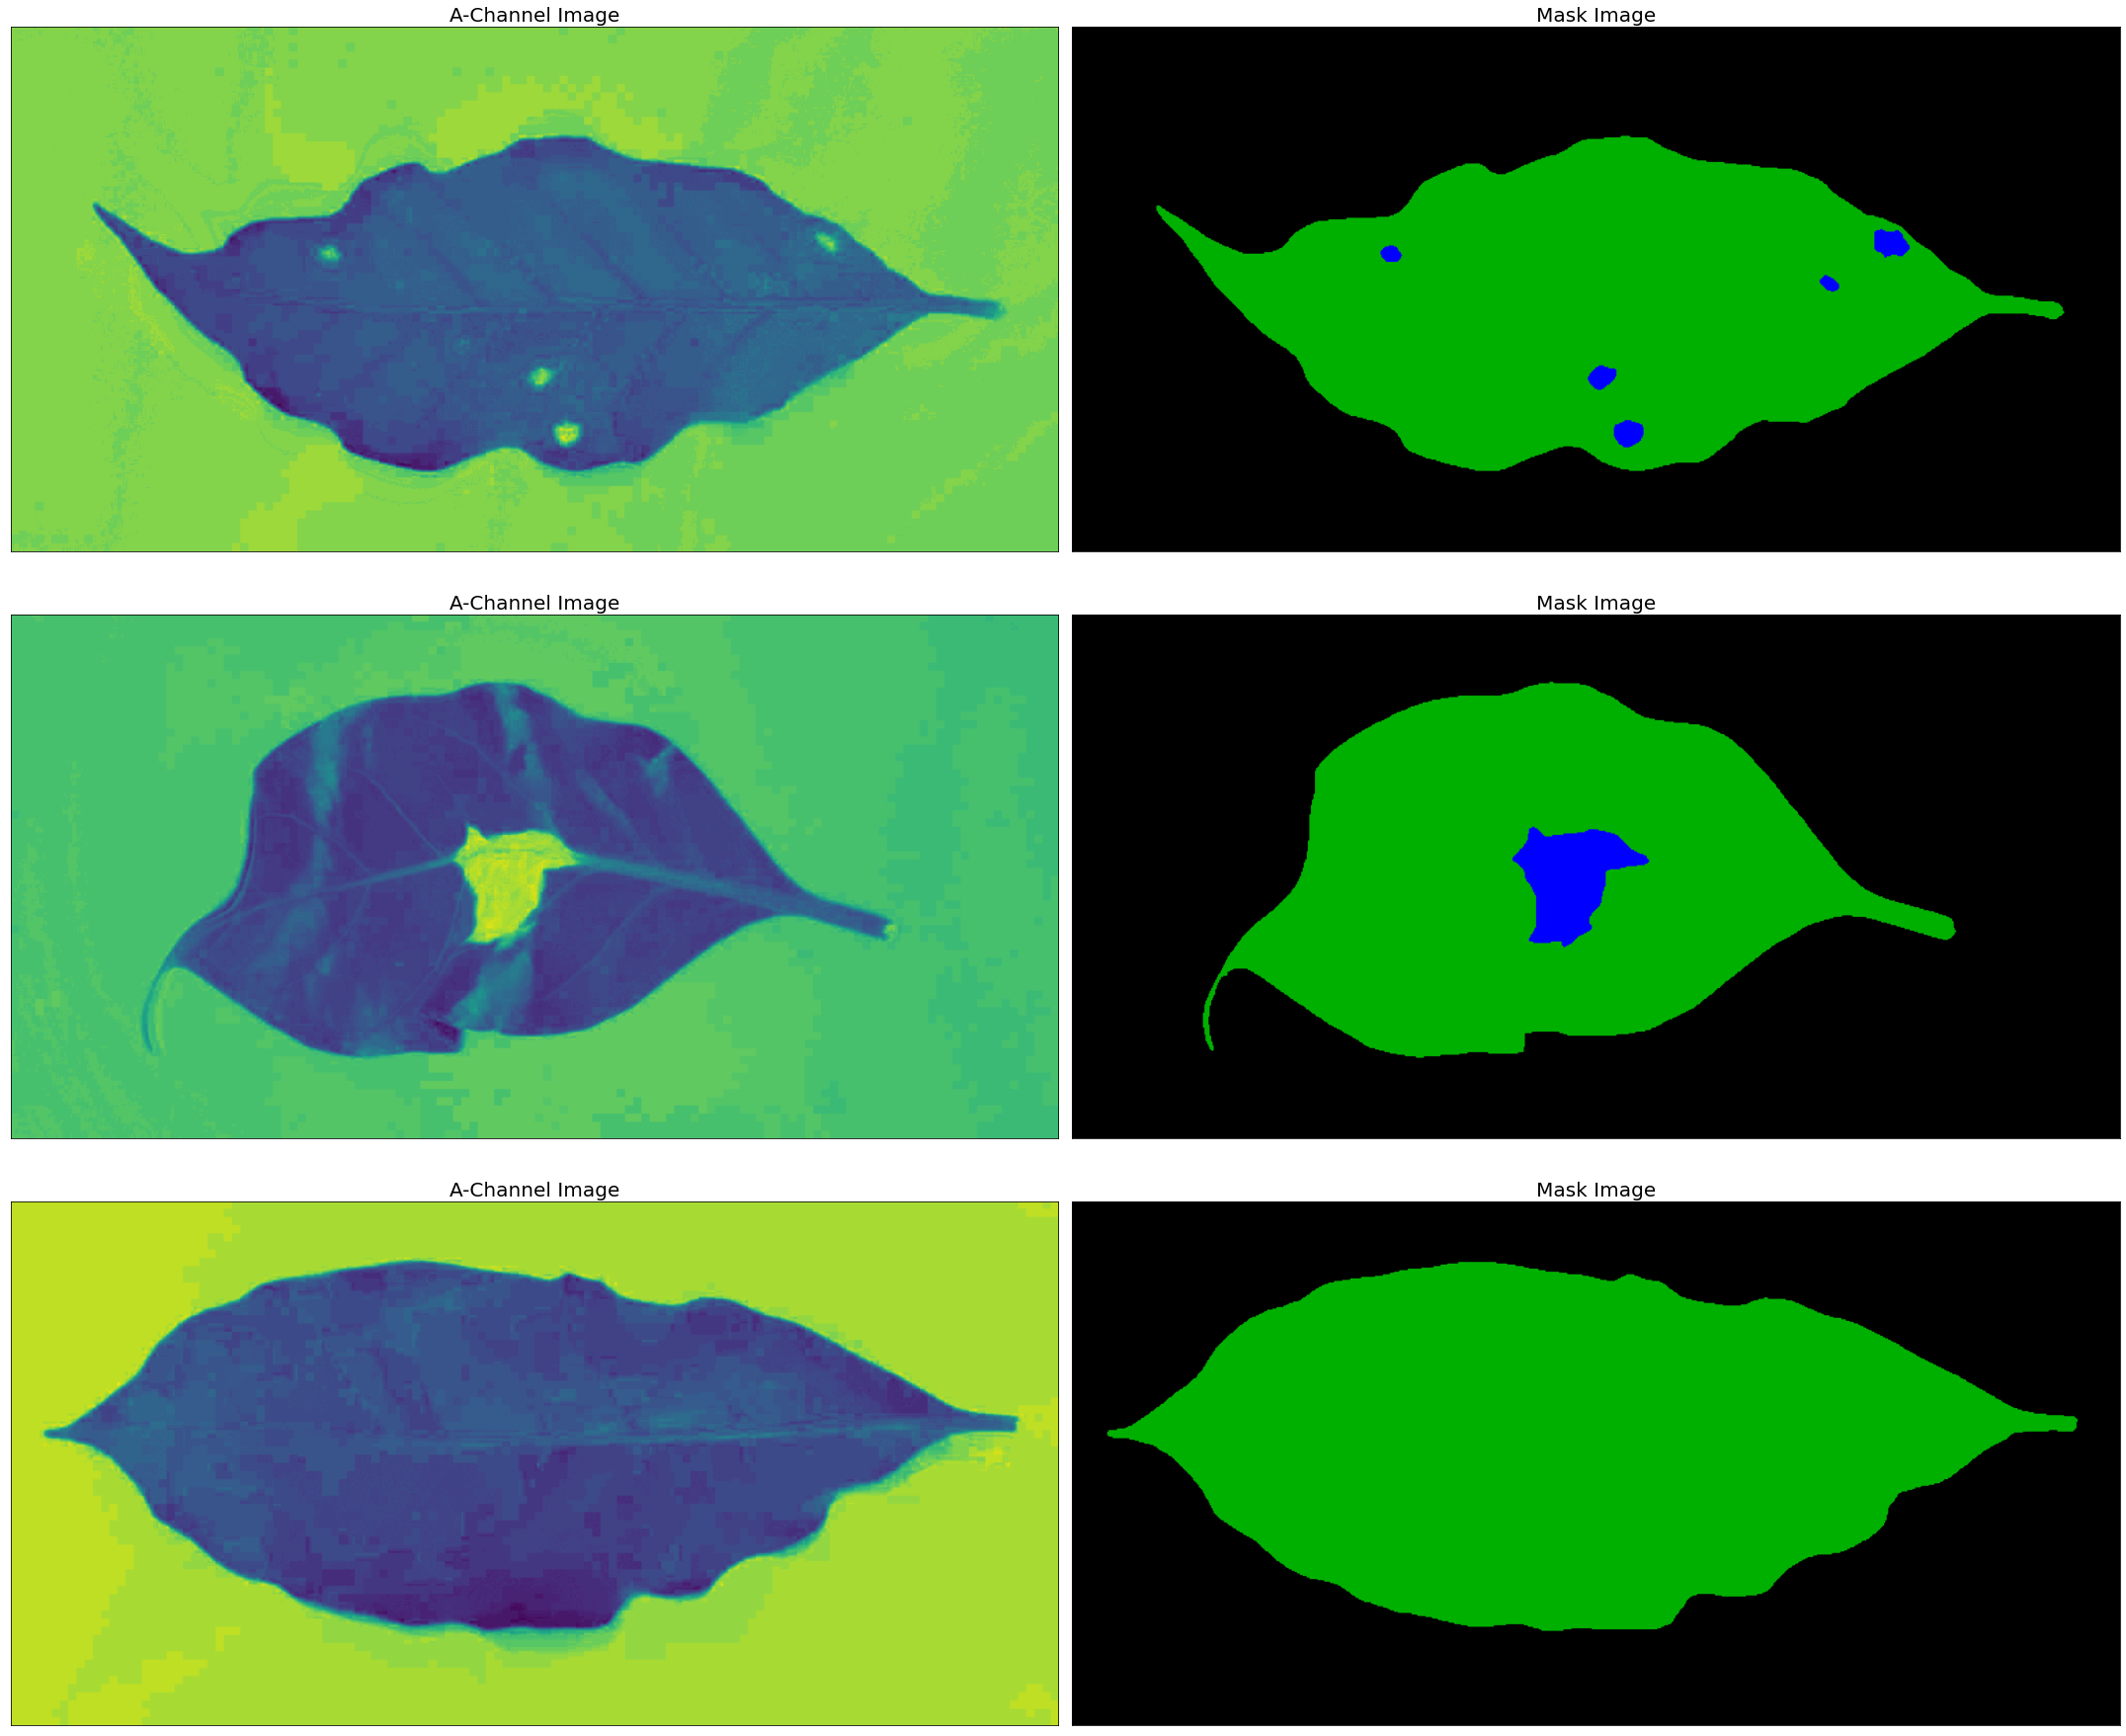

In [148]:
_, ax = plt.subplots(nrows=3, ncols=2, subplot_kw={'xticks': [], 'yticks': []}, figsize=(30, 25))
titles = ['A-Channel Image', 'Mask Image']
for i in range(3):
    idx = randint(0, len(img_path_list))

    for j, title, in enumerate(titles):
        img = cv2.imread(img_path_list[idx])
        mask_ = cv2.imread(mask_path_list[idx])
        lab_img_ = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        if j == 0:
            ax[i, j].imshow(lab_img_[:,:,1])
            ax[i, j].set_title(title, size=20)
            continue

        ax[i, j].imshow(mask_)
        ax[i, j].set_title(title,size=20)
plt.tight_layout()    
plt.show()

### Foreground Segmentation Using Otsu Thresholding

119.0
151.0
124.0
94.0


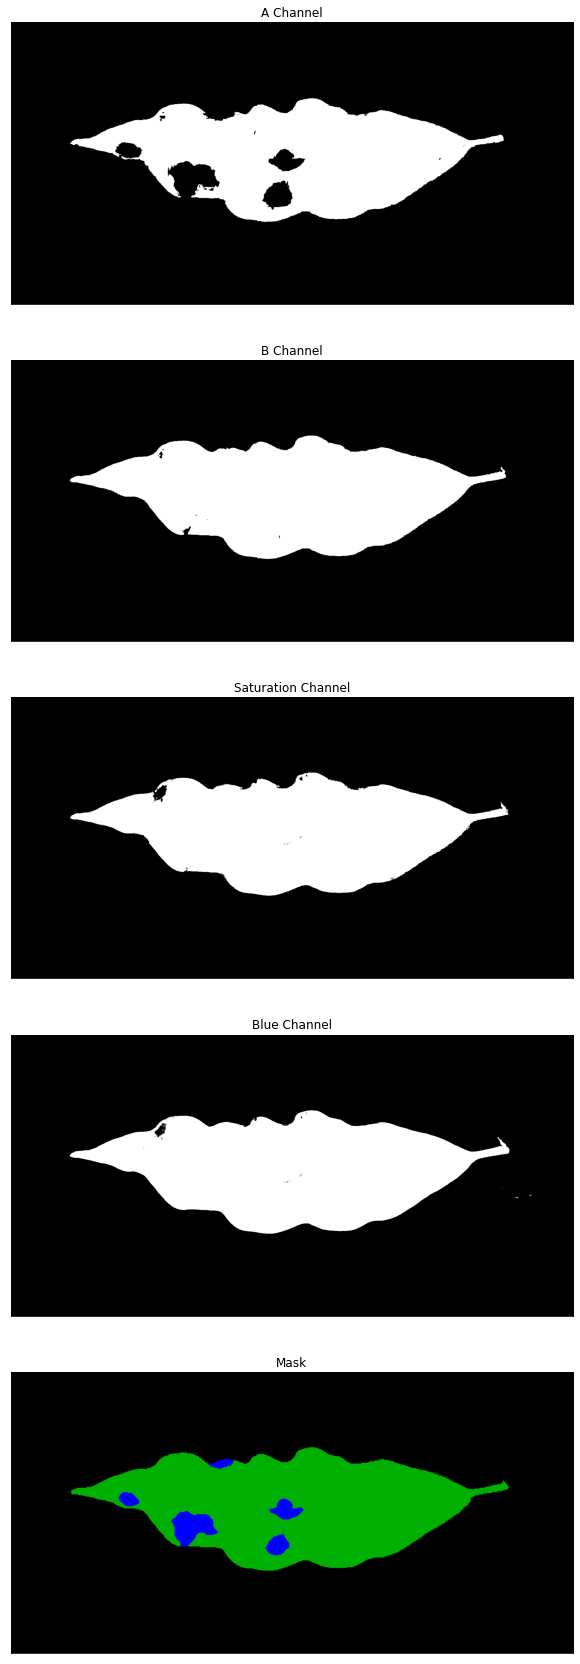

In [147]:
%matplotlib inline
# %matplotlib qt

plt.figure(figsize=(20, 30))
plt.subplot(511)
thresh_val, thresh_img = cv2.threshold(a_channel_img, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
plt.title('A Channel')
plt.xticks([]), plt.yticks([])
print(thresh_val)

plt.subplot(512)
thresh_val, thresh_img = cv2.threshold(b_channel_img, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
plt.title('B Channel')
plt.xticks([]), plt.yticks([])
print(thresh_val)

plt.subplot(513)
thresh_val, thresh_img = cv2.threshold(saturation_channel_img, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
plt.title('Saturation Channel')
plt.xticks([]), plt.yticks([])
print(thresh_val)

plt.subplot(514)
thresh_val, blue_foreground = cv2.threshold(rgb_img[:,:,2], 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(thresh_val)
plt.imshow(blue_foreground, cmap='gray')
plt.title('Blue Channel')
plt.xticks([]), plt.yticks([])


plt.subplot(515)
plt.imshow(mask)
plt.title('Mask')
plt.xticks([]), plt.yticks([])
plt.show()


#### Filling Holes on the Blue Channel Mask


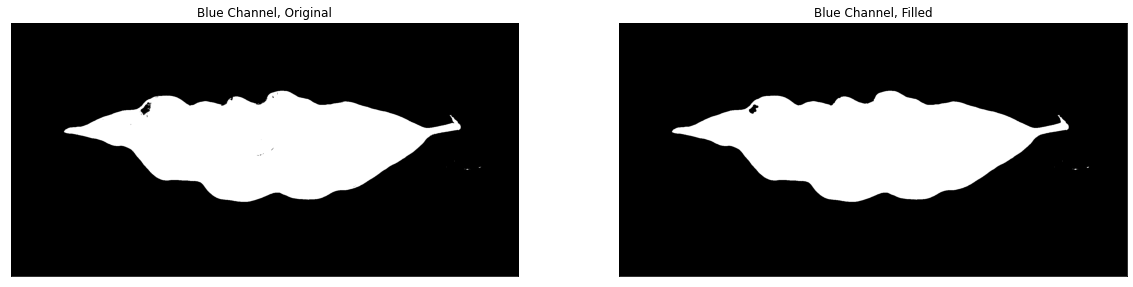

In [150]:
plt.figure(figsize=(20, 30))
plt.subplot(121)
plt.imshow(blue_foreground, cmap='gray')
plt.title('Blue Channel, Original')
plt.xticks([]), plt.yticks([])


plt.subplot(122)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11, 11))
filled_blue_img = cv2.morphologyEx(blue_foreground,cv2.MORPH_CLOSE,kernel)
plt.imshow(filled_blue_img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('Blue Channel, Filled')
plt.show()




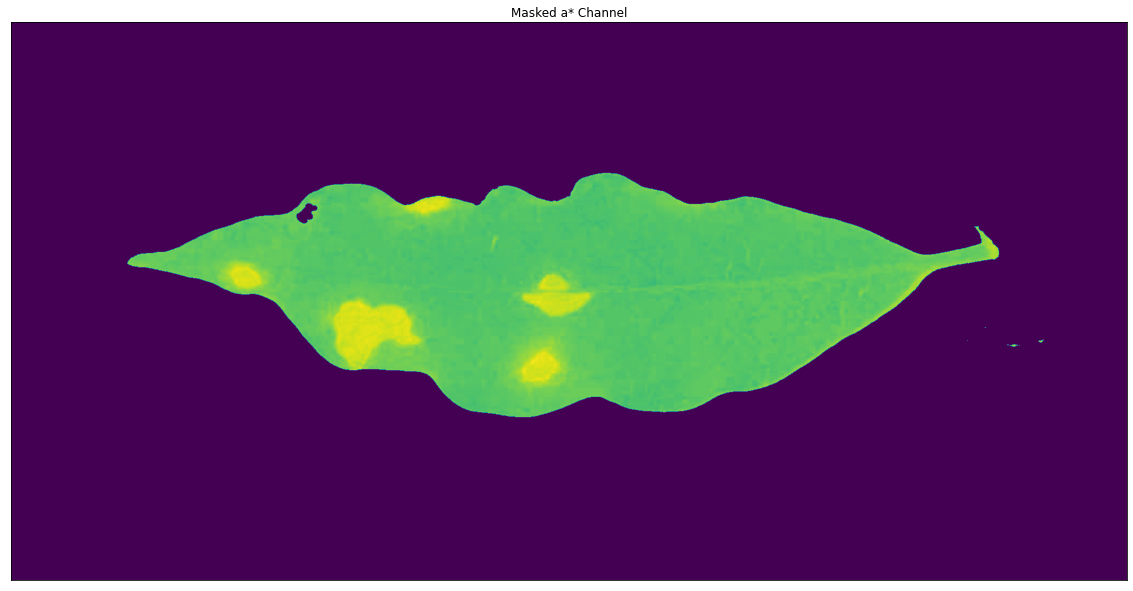

In [153]:
%matplotlib inline
# %matplotlib qt

masked_a_channel = cv2.bitwise_and(a_channel_img, a_channel_img, mask=filled_blue_img)

plt.figure(figsize=(20, 30))
plt.imshow(masked_a_channel)
plt.xticks([]), plt.yticks([])
plt.title('Masked a* Channel')
plt.show()

### Segmentation Using Multi-Otsu Thresholding

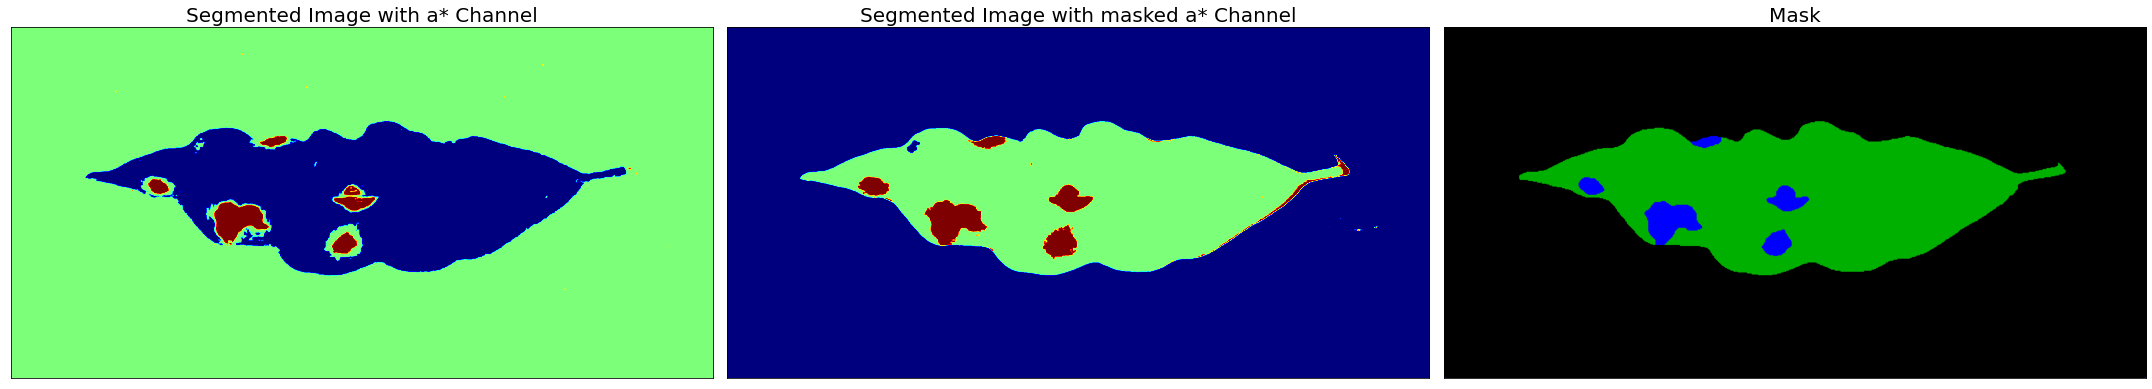

In [161]:

thresholds = threshold_multiotsu(a_channel_img) # find the two threshold values to segment the images into three regions(background, leaf, and the symptom)
regions = np.digitize(a_channel_img, bins=thresholds) # generate the three regions

plt.figure(figsize=(30, 20))


plt.subplot(131)
thresholds = threshold_multiotsu(a_channel_img) # find the two threshold values to segment the images into three regions(background, leaf, and the symptom)
regions = np.digitize(a_channel_img, bins=thresholds) # generate the three regions
plt.imshow(regions, cmap='jet')
plt.title('Segmented Image with a* Channel', size=20)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
thresholds = threshold_multiotsu(masked_a_channel) # find the two threshold values to segment the images into three regions(background, leaf, and the symptom)
regions = np.digitize(masked_a_channel, bins=thresholds) # generate the three regions
plt.imshow(regions, cmap='jet')
plt.title('Segmented Image with masked a* Channel', size=20)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(mask)
plt.title('Mask', size=20)
plt.xticks([]), plt.yticks([])

plt.tight_layout()


[  1 122]


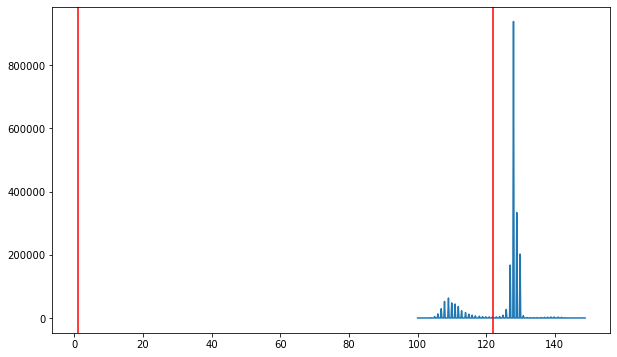

In [162]:
# hist, bin_edges = np.histogram(a_channel_img, bins=256, range=(a_channel_img.min(), a_channel_img.max()))
hist, bin_edges = np.histogram(a_channel_img, bins=256)
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], hist)
for thresh in thresholds:
    plt.axvline(thresh, color='red')
print(thresholds)

### Segmentation Using K-Means

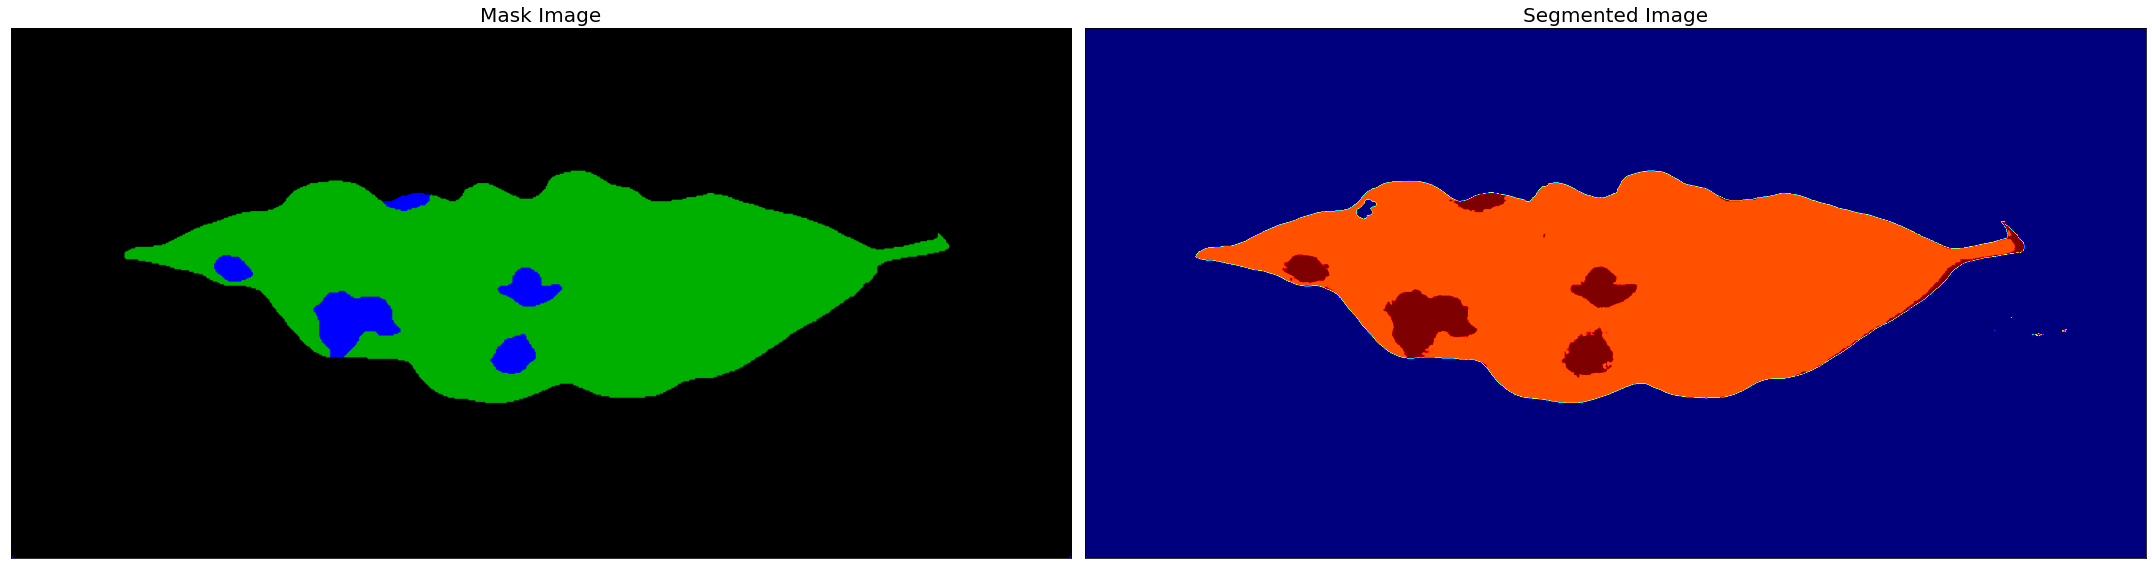

In [163]:
%matplotlib inline
# %matplotlib qt

compactness, labels, centers = cv2.kmeans(
    data=np.reshape(np.float32(masked_a_channel), (-1)), K=3,
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 100, 1.0),
    attempts=12,
    flags=cv2.KMEANS_RANDOM_CENTERS)


# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((a_channel_img.shape)) 

plt.figure(figsize=(30, 20))

plt.subplot(121)
plt.imshow(mask)
plt.title('Mask Image', size=20)
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(segmented_image, cmap='jet')
plt.title('Segmented Image', size=20)
plt.xticks([]),plt.yticks([])

plt.tight_layout()



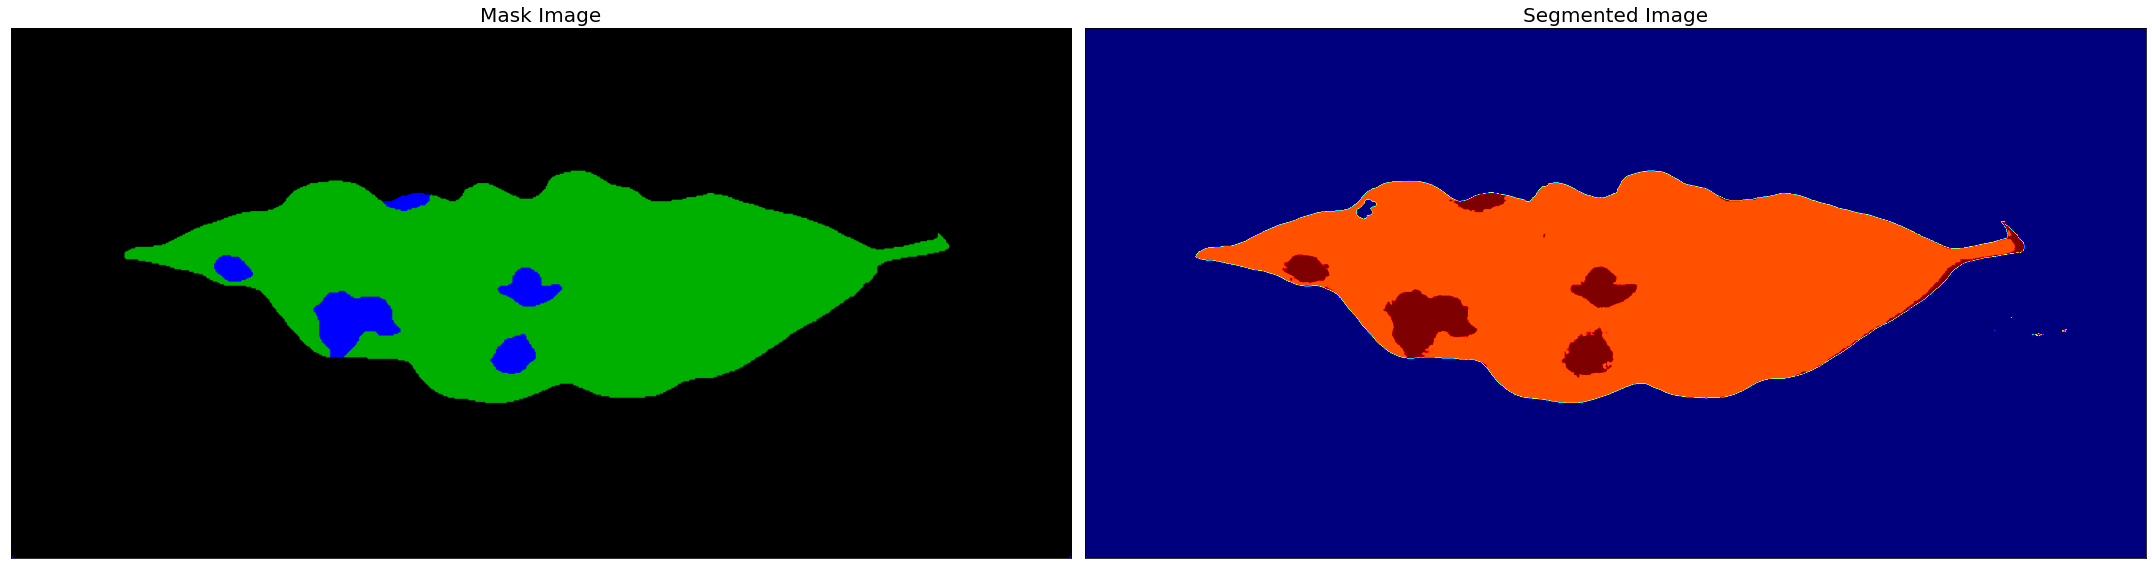

In [164]:
%matplotlib inline
# %matplotlib qt

compactness, labels, centers = cv2.kmeans(
    data=np.reshape(np.float32(masked_a_channel), (-1)), K=3,
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 100, 1.0),
    attempts=12,
    flags=cv2.KMEANS_RANDOM_CENTERS)


# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((masked_a_channel.shape)) 

plt.figure(figsize=(30, 20))

plt.subplot(121)
plt.imshow(mask)
plt.title('Mask Image', size=20)
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(segmented_image, cmap='jet')
plt.title('Segmented Image', size=20)
plt.xticks([]),plt.yticks([])

plt.tight_layout()



### Foreground Segmentation Using Otsu Thresholding

122.0
149.0
111.0
116.0


Text(0.5, 1.0, 'Mask')

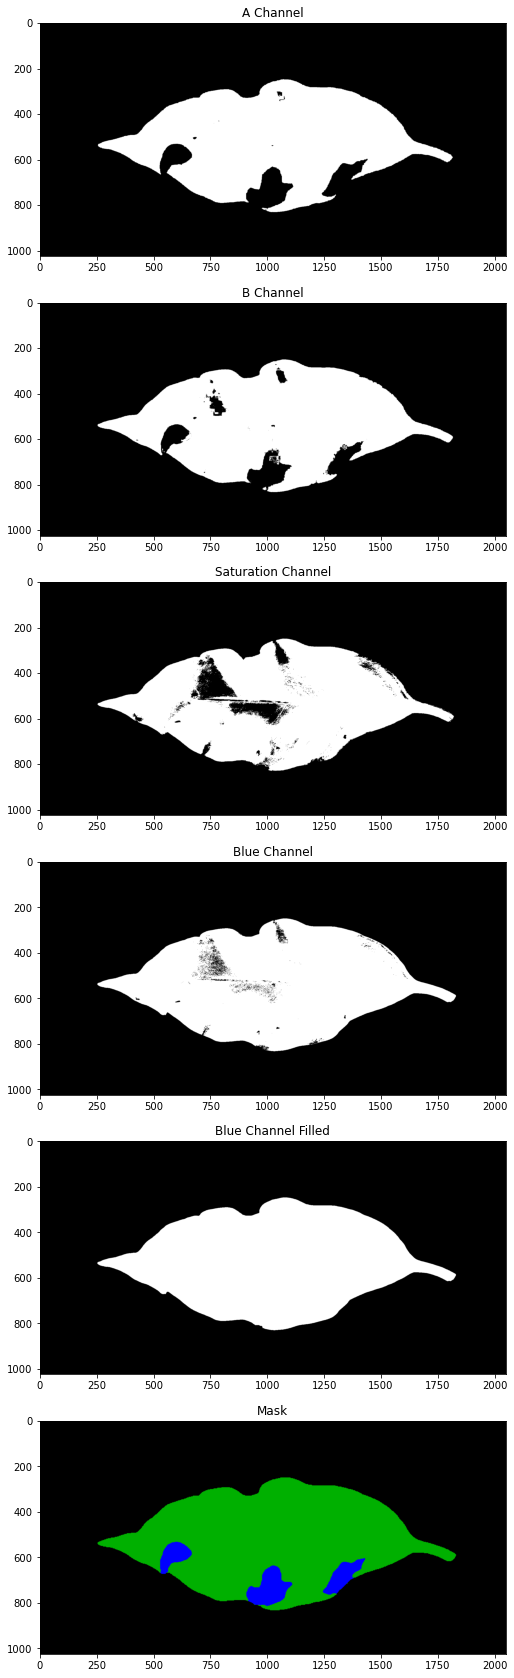

In [104]:
%matplotlib inline
# %matplotlib qt

plt.figure(figsize=(20, 30))
plt.subplot(611)
thresh_val, thresh_img = cv2.threshold(a_channel_img, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.title('A Channel')
plt.imshow(thresh_img, cmap='gray')
print(thresh_val)

plt.subplot(612)
thresh_val, thresh_img = cv2.threshold(b_channel_img, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
plt.title('B Channel')
print(thresh_val)

plt.subplot(613)
thresh_val, thresh_img = cv2.threshold(saturation_channel_img, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
plt.title('Saturation Channel')
print(thresh_val)

plt.subplot(614)
# thresh_val, thresh_img = cv2.threshold(rgb_img[:,:,2], 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thresh_val, blue_foreground = cv2.threshold(rgb_img[:,:,2], 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(thresh_val)
plt.imshow(blue_foreground, cmap='gray')
plt.title('Blue Channel')

plt.subplot(615)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11, 11))
blue_foreground_filled = cv2.morphologyEx(blue_foreground,cv2.MORPH_CLOSE,kernel)
plt.imshow(blue_foreground_filled, cmap='gray')
plt.title('Blue Channel Filled')

plt.subplot(616)
plt.imshow(mask)
plt.title('Mask')

#### Filling Holes on the Blue Channel Mask

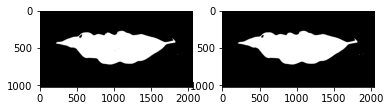

In [143]:
plt.subplot(121)
plt.imshow(blue_foreground, cmap='gray')

plt.subplot(122)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11, 11))
filled_blue_img = cv2.morphologyEx(blue_foreground,cv2.MORPH_CLOSE,kernel)
plt.imshow(filled_blue_img, cmap='gray')

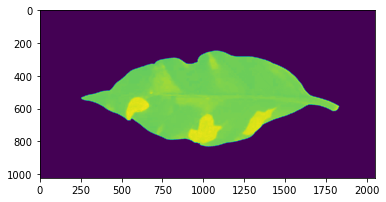

In [124]:
%matplotlib inline
# %matplotlib qt
#visualize only the masked regions in the image
masked_a_channel_img = cv2.bitwise_and(a_channel_img, a_channel_img, mask=filled_img)
plt.imshow(masked)

### Segmentation using Gaussian Mixture Model(GMM)


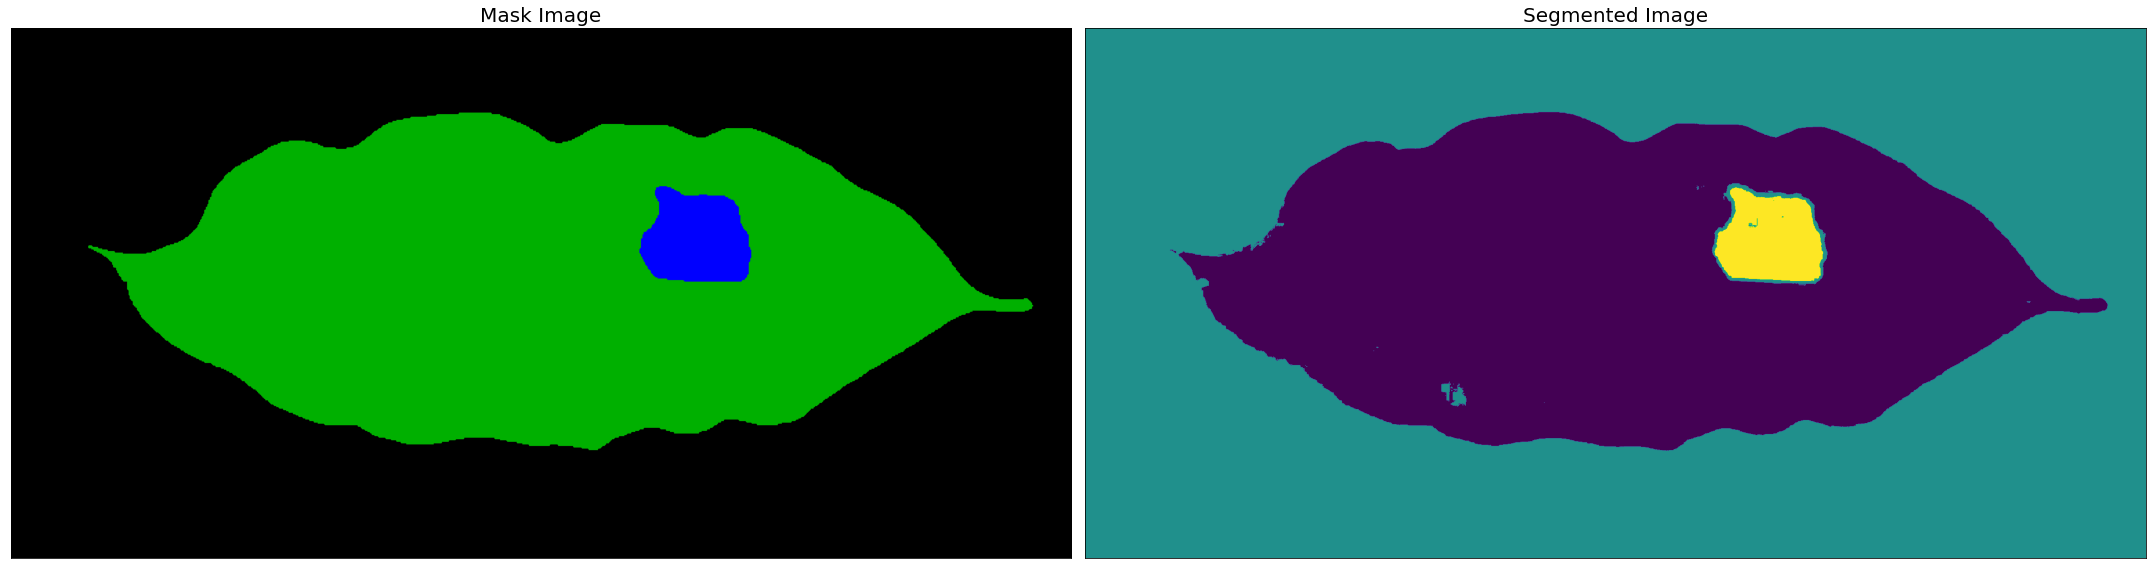

In [24]:
flat_img = a_channel_img.reshape((-1, 1))

gmm_model = GaussianMixture(n_components=3, covariance_type='tied').fit(flat_img)
gmm_labels = gmm_model.predict(flat_img)

segmented_img = gmm_labels.reshape(a_channel_img.shape)

plt.figure(figsize=(30, 20))

plt.subplot(121)
plt.imshow(mask)
plt.title('Mask Image', size=20)
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(segmented_img)
plt.title('Segmented Image', size=20)
plt.xticks([]),plt.yticks([])

plt.tight_layout()


### Adaptive Thesholding

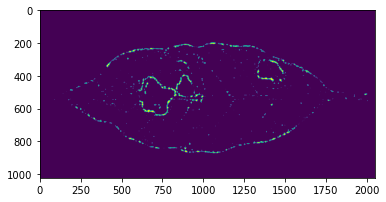

In [37]:
# thresh_ = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)
thresh_ = cv2.adaptiveThreshold(a_channel_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 31, 5)
# thresh_ = cv2.adaptiveThreshold(hsv_img[:,:,2], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
plt.imshow(thresh_)
# plt.imshow(blurred_img)

### Foreground Segmentation Using Edge Based Methods

In [95]:
np.unique(a_channel_img, return_counts=True)

(array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147], dtype=uint8),
 array([     2,     27,     63,    131,    312,    824,   1998,   4093,
          8587,  16489,  29834,  44495,  58859,  90507, 102778,  90691,
         66976,  47712,  34079,  30464,  18698,  12553,  10302,   7810,
          6483,   5754,   5234,   7430,  20940, 125901, 801590, 239301,
        117461,  10871,   4030,   4260,   4891,   6700,   8225,  10045,
         10807,  10163,   8698,   5395,   2822,   1413,    354,     89,
            10,      1], dtype=int64))

In [99]:
low_thresh = 114
high_thresh = 128
edges = cv2.Canny(a_channel_img, low_thresh, high_thresh)
plt.imshow(edges, cmap='gray')


In [ ]:
# blurred_img = cv2.bilateralFilter(a_channel_img, 11, 61, 39)
blurred_img = cv2.bilateralFilter(saturation_channel_img, 11, 61, 39)

# cv2.imshow('cat', blurred_img)



def TrackbarFunc(val):
    low_thresh = cv2.getTrackbarPos('Low Threshold', 'Canny Edge Detection')
    high_thresh = cv2.getTrackbarPos('High Threshold', 'Canny Edge Detection')
    # edges = cv2.Canny(a_channel_img, low_thresh, high_thresh)
    edges = cv2.Canny(blurred_img, low_thresh, high_thresh)
    cv2.imshow('Canny Edge Detection', edges)
    # cv2.imshow('Canny Edge Detection', edges)

cv2.namedWindow('Canny Edge Detection')
# cv2.createTrackbar('Low Threshold', 'Canny Edge Detection', 114, 150, TrackbarFunc)
# cv2.createTrackbar('High Threshold', 'Canny Edge Detection', 114, 150, TrackbarFunc)


cv2.createTrackbar('Low Threshold', 'Canny Edge Detection', 114, 255, TrackbarFunc)
cv2.createTrackbar('High Threshold', 'Canny Edge Detection', 114, 255, TrackbarFunc)

TrackbarFunc(0)
cv2.waitKey(0)
cv2.destroyAllWindows()





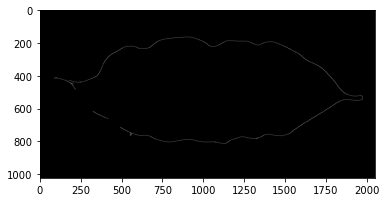

In [27]:
# blurred_img = cv2.GaussianBlur(gray_img, (23, 23), -1, -1)
blurred_img = cv2.bilateralFilter(saturation_channel_img, 11, 61, 39)
# plt.imshow(blurred_img, cmap='gray')


low_thresh = 0
high_thresh = 255
edges = cv2.Canny(blurred_img, low_thresh, high_thresh)
# edges = cv2.Canny(gray_img, low_thresh, high_thresh)

filled_img = nd.binary_fill_holes(edges)
plt.imshow(filled_img, cmap='gray')

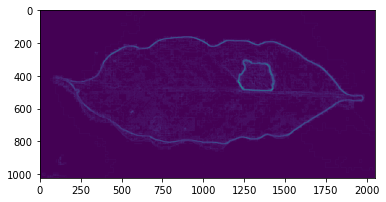

In [26]:

ksize = -1
# ksize = 3

gX = cv2.Sobel(a_channel_img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(a_channel_img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

plt.imshow(combined)

In [ ]:

# different ways to plot histogram

# counts, values= np.unique(gray_img, return_counts=True)
# plt.plot(values, counts)

# counts, values = np.histogram(gray_img, bins=256, range=(0, 255))
# plt.plot(values[:-1], counts)
# the bins is set to 256, since we want to see the pixel counts for each grayscale values
# print(len(values))
# print(len(counts)) # the last element is the stop value of the histogram

plt.hist(gray_img.flatten(), bins=256, range=(0, 255))
plt.xlabel('Grayscale Value')
plt.ylabel('Pixel Count')
plt.title('Grayscale Histogram')